In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib
from adjustText import adjust_text

/Users/jakubkopal/anaconda3/envs/CNV_asym/lib/python3.10/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [10]:
# Load data
df = pd.read_csv('data.csv')
# Data summary
df.iloc[:, 4:].head()

,site_num,CNV,genetic_stat2,age_spm,sex,volume,Front_Pole,Insula,Sup_Front_Gyr,Mid_Front_Gyr,...,I-IV_Cerebellum,V_Cerebellum,VI_Cerebellum,Crus_I_Cerebellum,Crus_II_Cerebellum,VIIb_Cerebellum,VIIIa_Cerebellum,VIIIb_Cerebellum,IX_Cerebellum,X_Cerebellum
0,5.0,Control,control,22.860274,1.0,656208.054260,-0.092960,0.046369,0.344461,-0.264657,...,-0.102233,0.032451,0.150079,-0.174795,-0.054574,-0.046199,0.047096,0.099211,-0.156032,0.153305
1,5.0,Control,control,21.230137,0.0,469667.024328,0.002016,0.080501,-0.008196,-0.038585,...,-0.144013,0.028179,0.107961,-0.124686,0.092272,-0.006210,-0.033934,-0.152433,-0.238413,0.166661
2,5.0,Control,control,39.063014,0.0,622233.118585,-0.083438,0.092485,0.355618,-0.004861,...,-0.016947,-0.005118,-0.031365,-0.065412,0.097700,-0.009841,-0.103504,-0.104361,-0.064086,0.090582
3,5.0,22q11.2,deletion,19.501370,1.0,560084.332875,-0.048563,-0.047620,0.044236,0.141042,...,-0.056222,0.047705,0.188013,0.114319,0.189179,-0.025723,-0.069550,-0.178888,-0.236144,-0.047871
4,5.0,Control,control,45.186301,1.0,543577.009900,-0.008999,-0.021376,0.519733,-0.167270,...,-0.197660,-0.065852,0.064221,-0.074985,-0.010784,0.065271,0.114610,0.077610,-0.175472,0.113341


Extract regional volumes

In [11]:
X_full = np.array(df.iloc[:, 10:])
X_ctrl = X_full[df.CNV == 'Control']
X_mut = X_full[df.CNV != 'Control']
# Scale data
X_full_ss = scale.fit_transform(X_full)
X_ctrl_ss = scale.fit_transform(X_ctrl)
X_mut_ss = scale.transform(X_mut)


Inicialize plotting

In [3]:
matplotlib.rcParams["svg.fonttype"] = "none"
plt.rcParams.update({"font.family": "Helvetica Neue"})
cm = 1 / 2.54  # centimeters in inches



In [12]:
category_names = ['1q21.1del', '1q21.1dup', '16p11.2del', '16p11.2dup',
                  '22q11.2del', '22q11.2dup']
target_mut = df_mutsubs.CNV.map({'1q21.1': 0, '15q11.2': 1, '16p11.2': 2,
                                 '22q11.2': 3})
y_mut = df_mutsubs.genetic_stat2.map({'deletion': 0, 'duplication': 1})
y = np.array(y_mut+(target_mut*2))


Multiclass LDA model

In [8]:
model = LinearDiscriminantAnalysis(solver='eigen')
model.fit(X_mut_ss, y)
coeffs = model.coef_.T
scores = model.transform(X_mut_ss)
scales = model.scalings_

Plot LDA explained variance

/var/folders/p2/p07_4q2s2vq2gnrl1hh3yvfw0000gn/T/ipykernel_10346/3580254308.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Component', y="Explained variance", data=d,


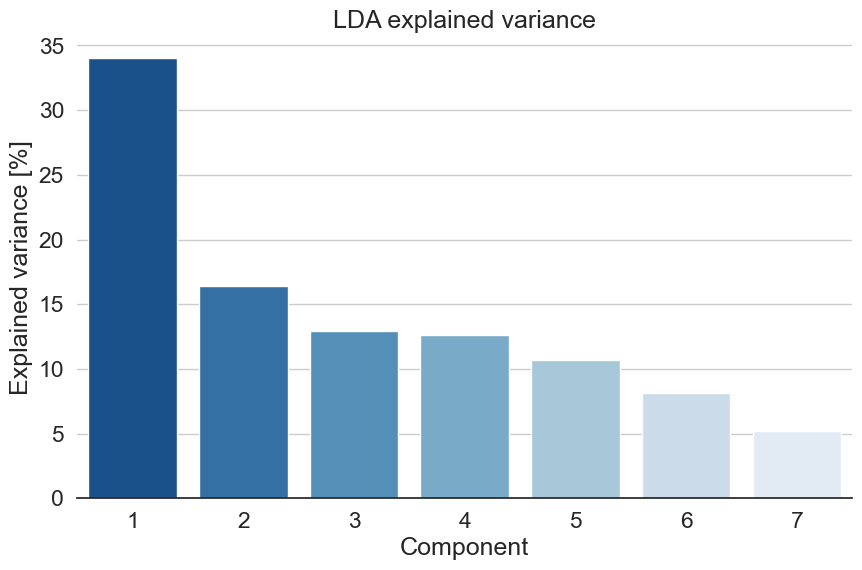

In [5]:
d = ({'Explained variance': model.explained_variance_ratio_*100,
      'Component': np.arange(1, len(category_names), 1)})
sns.set_theme(style="white", palette='colorblind', font_scale=1.5)
fig, ax = plt.subplots(1, figsize=(10, 6))
g = sns.barplot(x='Component', y="Explained variance", data=d,
                palette='Blues_r')
g.set_ylabel('Explained variance [%]')
g.set_xlabel('Component')
g.set_title('LDA explained variance')
ax.yaxis.grid()
sns.despine(left=True)
plt.show()

Plot LDA model coefficients

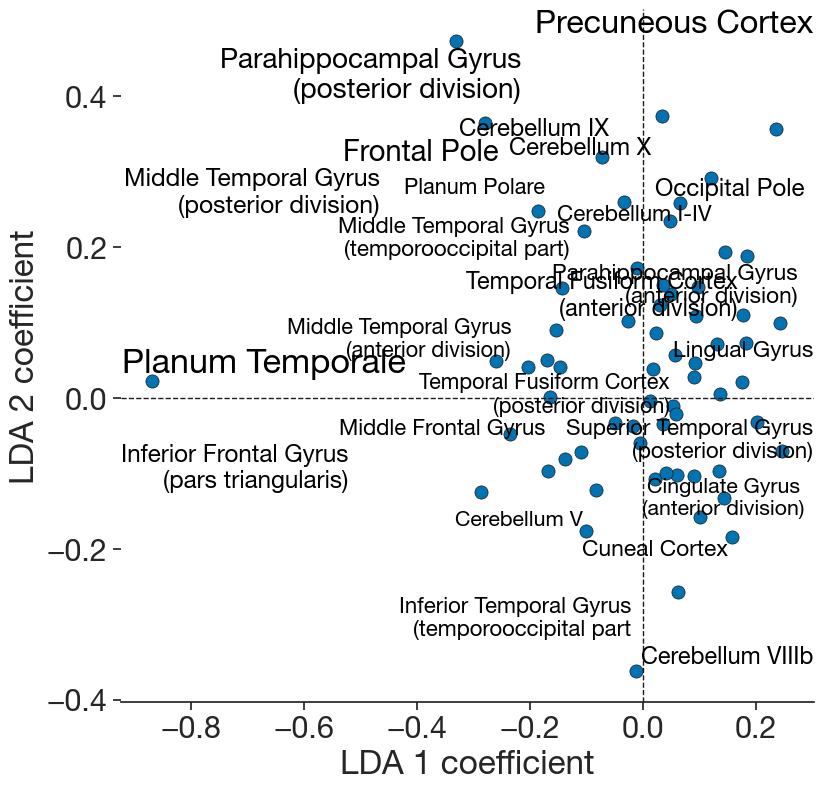

In [7]:
d = pd.DataFrame({'C1': model.scalings_[:, 0], 'C2': model.scalings_[:, 1]})

sns.set_theme(style="ticks", palette="colorblind", font_scale=2,
              font='Helvetica Neue', rc={"axes.spines.right": False,
                                         "axes.spines.top": False,
                                         "axes.spines.left": False})
fig, ax = plt.subplots(1, figsize=(9, 9))
h = sns.scatterplot(x='C1', y='C2', data=d, s=90, linewidth=0.5,
                edgecolor='k')
texts = [plt.text(d["C1"][i], d["C2"][i], txt, color='black',
                  size=(np.abs(d.C1.values[i])+np.abs(d.C2.values[i])+0.75)*15)
         for i, txt in enumerate(my_regions) if (np.abs(d.C1.values[i])+np.abs(d.C2.values[i])+1.5*np.abs(d.C1.values[i])*np.abs(d.C2.values[i]))>0.3]
h.set_xlabel('LDA 1 coefficient')
h.set_ylabel('LDA 2 coefficient')
ax.set_box_aspect(1)
sns.despine(left=True)
plt.axvline(x=0, linestyle='--', linewidth=1, color='k')
plt.axhline(y=0, linestyle='--', linewidth=1, color='k')
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=0.001))
plt.show()